Using andas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on a random website from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart. 
- Create a draw_bar_plot function that draws a bar chart. 
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots.
    - These box plots should show how the values are distributed within a given year or month and how it compares over time.
    - The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 
    - Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [110]:
df=pd.read_csv("data/fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [111]:
df.shape

(1304, 1)

In [112]:
#clean data
df=df[
    (df["value"]>= df["value"].quantile(0.025)) & 
    (df["value"]<= df["value"].quantile(0.975))]

df.shape

(1238, 1)

Text(0, 0.5, 'Page Views')

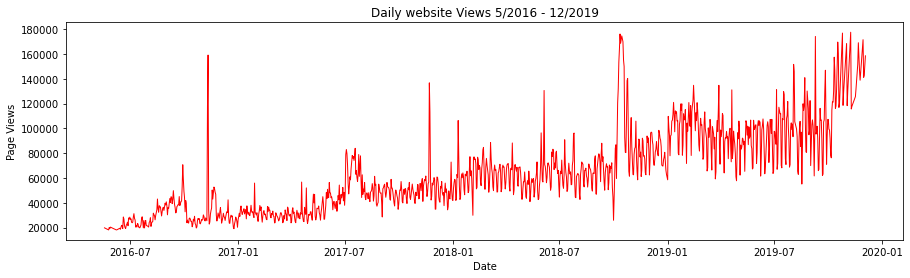

In [113]:
#draw line plot
fig,ax= plt.subplots(figsize= (15,4))
ax.plot(df.index, df["value"], "r", linewidth=1)

ax.set_title("Daily website Views 5/2016 - 12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

#fig.savefig ("line_plot.png")

In [115]:
#bar plot
df["month_num"] = df.index.month
df["Year"] = df.index.year


df_bar=df.groupby(["Year", "month_num"])["value"].mean()
df_bar=df_bar.unstack()
df_bar.columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]
#.unstack() -- Returns a df having a new level of column labels whose inner-most level consists of the pivoted index labels.

[]

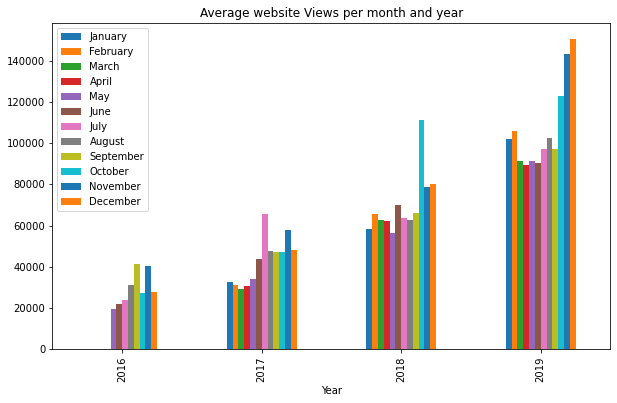

In [146]:
fig_2=df_bar.plot.bar(legend= True, figsize =(10,6), title ="Average website Views per month and year")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

fig_2.plot()

In [139]:
?Data.plot()

Object `df.plot()` not found.


In [117]:
#box plot
df_box=df.copy()
df_box.reset_index(inplace=True)
df_box["Year"] = [d.year for d in df_box.date]
df_box["Month"] = [d.strftime ("%b") for d in df_box.date]

,date,value,month_num,Year,Month
0,2016-05-19,19736,5,2016,May
1,2016-05-26,18060,5,2016,May
2,2016-05-27,19997,5,2016,May
3,2016-05-28,19044,5,2016,May
4,2016-05-29,20325,5,2016,May
...,...,...,...,...,...
1233,2019-11-24,138875,11,2019,Nov
1234,2019-11-29,171584,11,2019,Nov
1235,2019-11-30,141161,11,2019,Nov
1236,2019-12-01,142918,12,2019,Dec


In [119]:
df_box=df_box.sort_values("month_num")
df_box

,date,value,month_num,Year,Month
210,2017-01-06,37353,1,2017,Jan
593,2018-01-24,61700,1,2018,Jan
592,2018-01-23,62758,1,2018,Jan
572,2018-01-03,56013,1,2018,Jan
573,2018-01-04,58910,1,2018,Jan
...,...,...,...,...,...
902,2018-12-02,73710,12,2018,Dec
901,2018-12-01,62373,12,2018,Dec
921,2018-12-21,85083,12,2018,Dec
188,2016-12-15,42333,12,2016,Dec


Text(0, 0.5, 'Page Views')

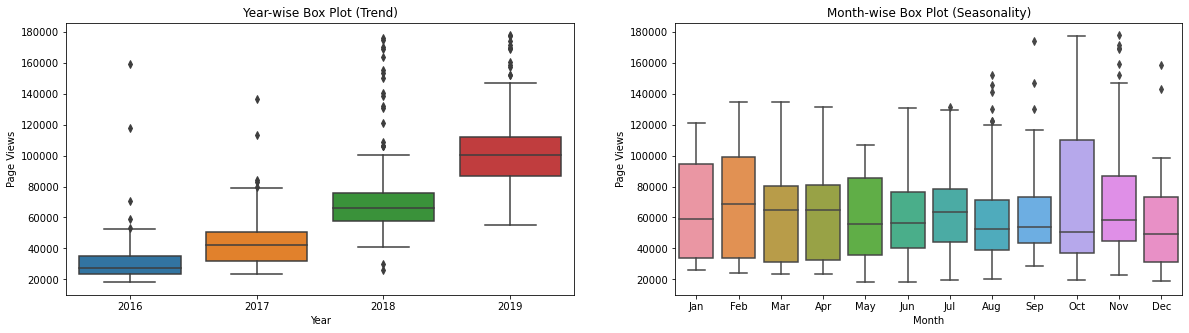

In [123]:
fig, axes =plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes[0]=sns.boxplot(x=df_box["Year"], y =df_box["value"],ax=axes[0])
axes[1]=sns.boxplot(x=df_box["Month"], y=df_box["value"],ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel ("Page Views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel ("Page Views")

#fig.savefig("box_plot.png")